<a href="https://colab.research.google.com/github/elli1zabeth/lecture1/blob/regresja/PUM4_regresja_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

zaczytanie niezbędnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor, TheilSenRegressor, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import PredictionErrorDisplay

zaczytaj dane dotyczace sprzedazy

In [2]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-2-72cc2aa30810>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 18.9k/18.9k [00:00<00:00, 20.0MB/s]

First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


preprocessing

1.   sprawdż typy danych
2.   zmien etykiedy na zmienne liczbowe
3. w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
le = LabelEncoder()

for column in ['Gender', 'Education Level', 'Job Title']:
  if column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


Podziel zbiór danych na testowy i treningowy w stosunku 30/70

In [5]:
df.dropna(inplace=True)
y = df['Salary']
X = df.drop('Salary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Stworz model regresji liniowej korzystajac z parametrów domyślnych
Przykład dokumentacji: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [6]:
regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)


ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji

In [7]:
print(f"Średni błąd kwadratowy: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Średni błąd absolutny: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Wyjaśniona wariancja: {explained_variance_score(y_test, y_pred):.2f}")

Średni błąd kwadratowy: 252493731.92
Średni błąd absolutny: 11377.18
Wyjaśniona wariancja: 0.89


spróbuj poprawić model, zacznij od danych, sprawdz korelacje, znormalizuj

In [8]:
# sprawdzam korelacje
correlation_matrix = df.corr()
print(correlation_matrix)
# usuwam zmienna Age mocno skorelowana w Years of Experience
X_train.drop('Age', axis=1, inplace=True)
X_test.drop('Age', axis=1, inplace=True)

                          Age    Gender  Education Level  Job Title  \
Age                  1.000000 -0.020324         0.562693   0.117629   
Gender              -0.020324  1.000000        -0.044717   0.014307   
Education Level      0.562693 -0.044717         1.000000   0.099934   
Job Title            0.117629  0.014307         0.099934   1.000000   
Years of Experience  0.979128  0.002884         0.590863   0.100162   
Salary               0.922335  0.071106         0.670371   0.136206   

                     Years of Experience    Salary  
Age                             0.979128  0.922335  
Gender                          0.002884  0.071106  
Education Level                 0.590863  0.670371  
Job Title                       0.100162  0.136206  
Years of Experience             1.000000  0.930338  
Salary                          0.930338  1.000000  


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
regressorLscaled = LinearRegression().fit(X_train, y_train)
print(f"Współczynniki: {regressorLscaled.coef_}")
y_predLscaled = regressorLscaled.predict(X_test)
print(f"Średni błąd kwadratowy: {mean_squared_error(y_test, y_predLscaled):.2f}")
print(f"Średni błąd absolutny: {mean_absolute_error(y_test, y_predLscaled):.2f}")
print(f"Wyjaśniona wariancja: {explained_variance_score(y_test, y_predLscaled):.2f}")

Współczynniki: [ 2971.01297509 10166.27333909  2199.97812057 38312.74995353]
Średni błąd kwadratowy: 240128620.02
Średni błąd absolutny: 11005.92
Wyjaśniona wariancja: 0.89


Zbuduj model regresji odpornej i przetestuj jego predykcje

In [11]:
regressorHuber = HuberRegressor().fit(X_train, y_train)
print(f"Współczynniki: {regressorHuber.coef_}")
y_predHuber = regressorHuber.predict(X_test)
print(f"Średni błąd kwadratowy: {mean_squared_error(y_test, y_predHuber):.2f}")
print(f"Średni błąd absolutny: {mean_absolute_error(y_test, y_predHuber):.2f}")
print(f"Wyjaśniona wariancja: {explained_variance_score(y_test, y_predHuber):.2f}")

Współczynniki: [ 2485.70315638  7888.17369579  2903.08543782 40476.17259178]
Średni błąd kwadratowy: 235150843.23
Średni błąd absolutny: 10940.94
Wyjaśniona wariancja: 0.90


Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

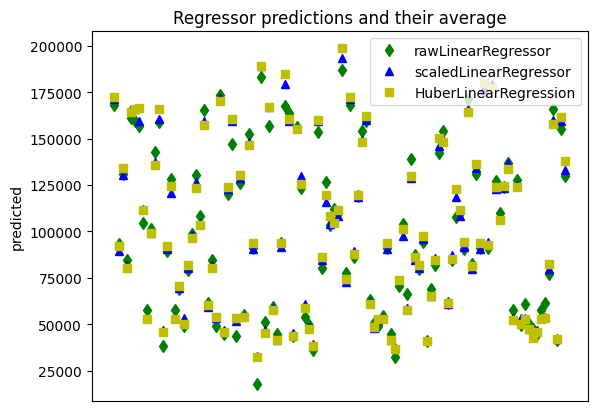

In [12]:
plt.figure()
plt.plot(y_pred, "gd", label="rawLinearRegressor")
plt.plot(y_predLscaled, "b^", label="scaledLinearRegressor")
plt.plot(y_predHuber, "ys", label="HuberLinearRegression")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

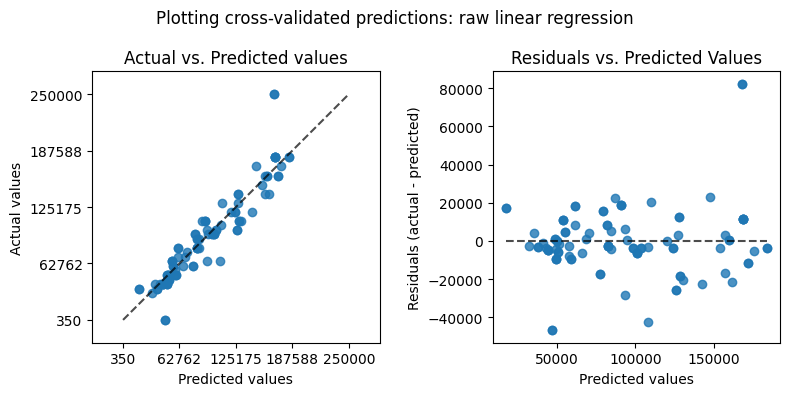

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions: raw linear regression")
plt.tight_layout()
plt.show()

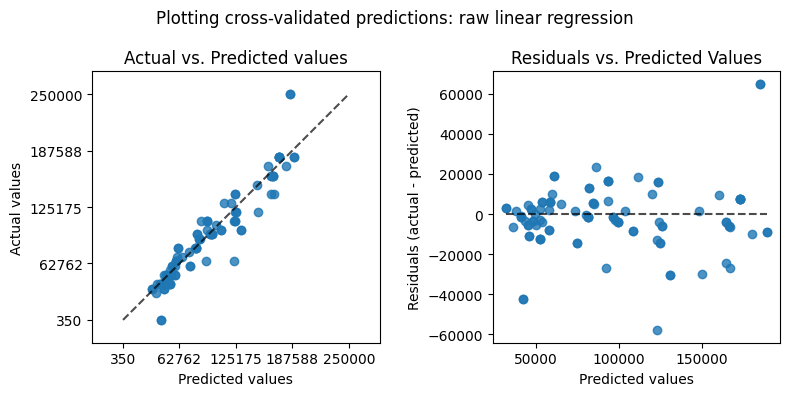

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_predHuber,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_predHuber,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions: raw linear regression")
plt.tight_layout()
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

               feature        VIF
0                  Age  15.191310
1               Gender   2.059767
2      Education Level   2.403316
3            Job Title   4.865563
4  Years of Experience   9.479247
